In [7]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [21]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [26]:
print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


In [27]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


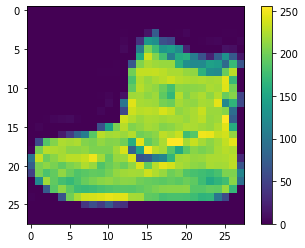

In [34]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [35]:
train_images = train_images / 255.0
test_images = test_images / 255.0

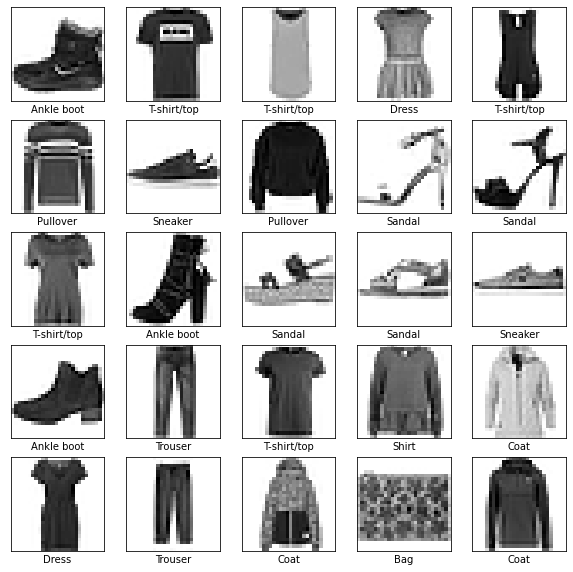

In [36]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5013 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3776 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3395 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3153 - accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2964 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2832 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2700 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2598 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2508 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.242

In [41]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3426 - accuracy: 0.8797 - 616ms/epoch - 2ms/step

Test accuracy: 0.8797000050544739


In [44]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([1.0675036e-06, 5.1288697e-07, 1.3333408e-09, 2.1846462e-10,
       9.6296890e-09, 1.4640026e-04, 8.7554236e-07, 6.9279247e-04,
       2.3047303e-08, 9.9915838e-01], dtype=float32)

In [45]:
np.argmax(predictions[0])

9

In [46]:
test_labels[0]

9

In [47]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

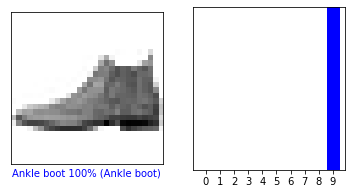

In [48]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

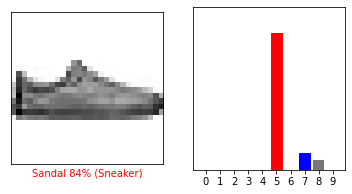

In [49]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

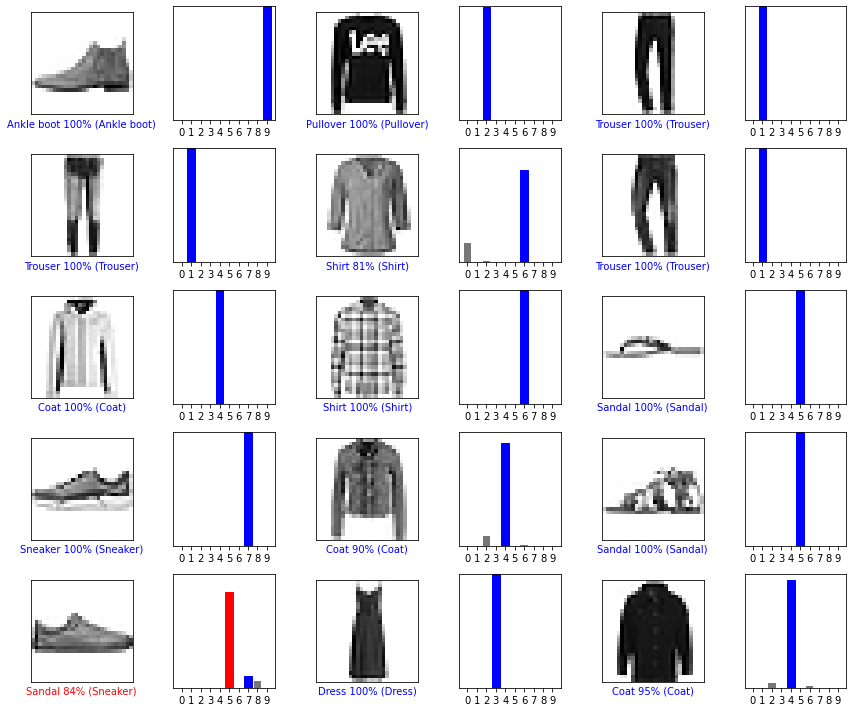

In [50]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(1, 28, 28)
[[8.7870161e-05 4.0217161e-12 9.9762326e-01 3.6266442e-08 6.9049158e-04
  3.5706631e-12 1.5984043e-03 2.5237893e-18 4.2536499e-08 3.4592674e-12]]


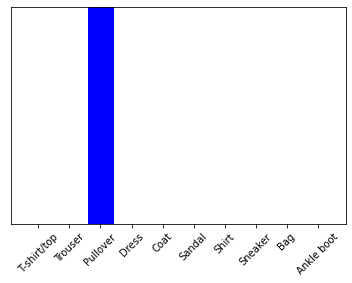

In [59]:
img = test_images[1]
img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()